In [1]:
from pathlib import Path
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results_dir = Path("results")

rows = list()

for p in results_dir.glob('*.pt'):
    series = torch.load(p)
    
    for r in series:
        rows.append({
            'name': p.stem.replace('_', ' '),
            'loss': float(r['final_loss']),
            'size': r['size']
        })
        
df = pd.DataFrame(rows)

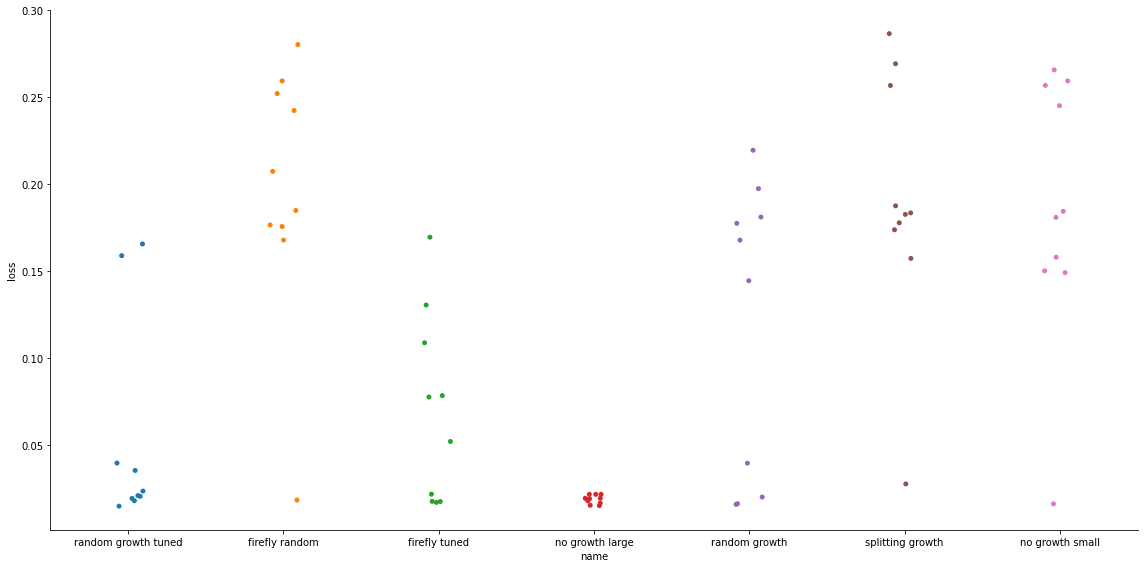

In [3]:
sns.catplot(x="name", y="loss", data=df, height=8, aspect=2)
plt.show()